<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Проверка-корректности-расчета-rougher.output.recovery" data-toc-modified-id="Проверка-корректности-расчета-rougher.output.recovery-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Проверка корректности расчета rougher.output.recovery</a></span></li><li><span><a href="#Признаки-недоступные-в-тестовой-выборке" data-toc-modified-id="Признаки-недоступные-в-тестовой-выборке-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Признаки недоступные в тестовой выборке</a></span></li><li><span><a href="#Проверка-на-явные-дубликаты" data-toc-modified-id="Проверка-на-явные-дубликаты-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Проверка на явные дубликаты</a></span></li><li><span><a href="#Проверка-на-пропуски" data-toc-modified-id="Проверка-на-пропуски-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Проверка на пропуски</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Распределение-концентрации-металлов-на-разных-этапах" data-toc-modified-id="Распределение-концентрации-металлов-на-разных-этапах-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Распределение концентрации металлов на разных этапах</a></span></li><li><span><a href="#Сравнение-распределения-гранул-сырья-в-тренировочной-и-тестовой-выборке" data-toc-modified-id="Сравнение-распределения-гранул-сырья-в-тренировочной-и-тестовой-выборке-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Сравнение распределения гранул сырья в тренировочной и тестовой выборке</a></span></li><li><span><a href="#Исследование-суммарной-концентрации-всех-веществ-на-разных-стадиях:-в-сырье,-в-черновом-и-финальном-концентратах." data-toc-modified-id="Исследование-суммарной-концентрации-всех-веществ-на-разных-стадиях:-в-сырье,-в-черновом-и-финальном-концентратах.-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Исследование суммарной концентрации всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Функция-для-вычисления-итоговой-sMAPE" data-toc-modified-id="Функция-для-вычисления-итоговой-sMAPE-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Функция для вычисления итоговой sMAPE</a></span></li><li><span><a href="#Выбор-лучшей-модели" data-toc-modified-id="Выбор-лучшей-модели-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Выбор лучшей модели</a></span></li><li><span><a href="#Проверка-на-тестовой-выборке" data-toc-modified-id="Проверка-на-тестовой-выборке-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Проверка на тестовой выборке</a></span></li></ul></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовим прототип модели машинного обучения. Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Нам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
df_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
df_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
df_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')

### Проверка корректности расчета rougher.output.recovery

In [3]:
check_recovery = (df_train['rougher.output.concentrate_au'] * (df_train['rougher.input.feed_au'] - df_train['rougher.output.tail_au'])\
/ (df_train['rougher.input.feed_au'] * (df_train['rougher.output.concentrate_au'] - df_train['rougher.output.tail_au'])))\
* 100

In [4]:
mean_absolute_error(df_train['rougher.output.recovery'], check_recovery)

9.73512347450521e-15

MAE стремится к нулю, можно сделать вывод, что **recovery** посчитано правильно.

### Признаки недоступные в тестовой выборке

In [5]:
count = 0
for column in df_train.columns:
    if column not in df_test.columns:
        count +=1
        print(column)
print(count)

final.output.concentrate_ag
final.output.concentrate_pb
final.output.concentrate_sol
final.output.concentrate_au
final.output.recovery
final.output.tail_ag
final.output.tail_pb
final.output.tail_sol
final.output.tail_au
primary_cleaner.output.concentrate_ag
primary_cleaner.output.concentrate_pb
primary_cleaner.output.concentrate_sol
primary_cleaner.output.concentrate_au
primary_cleaner.output.tail_ag
primary_cleaner.output.tail_pb
primary_cleaner.output.tail_sol
primary_cleaner.output.tail_au
rougher.calculation.sulfate_to_au_concentrate
rougher.calculation.floatbank10_sulfate_to_au_feed
rougher.calculation.floatbank11_sulfate_to_au_feed
rougher.calculation.au_pb_ratio
rougher.output.concentrate_ag
rougher.output.concentrate_pb
rougher.output.concentrate_sol
rougher.output.concentrate_au
rougher.output.recovery
rougher.output.tail_ag
rougher.output.tail_pb
rougher.output.tail_sol
rougher.output.tail_au
secondary_cleaner.output.tail_ag
secondary_cleaner.output.tail_pb
secondary_cleaner.

В тестовой выборке не доступны выходные данные на разных этапах, что логично, ведь нам нужно предсказывать характеристики до запуска производства, чтобы оно было не убыточное.

### Проверка на явные дубликаты

In [6]:
df_train.duplicated().sum()

0

In [7]:
df_test.duplicated().sum()

0

In [8]:
df_full.duplicated().sum()

0

### Проверка на пропуски

In [9]:
df_train.isna().sum()

date                                            0
final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.concentrate_au                     0
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
Length: 87, dtype: int64

In [10]:
df_test.isna().sum()

date                                           0
primary_cleaner.input.sulfate                  4
primary_cleaner.input.depressant               5
primary_cleaner.input.feed_size                0
primary_cleaner.input.xanthate                 4
primary_cleaner.state.floatbank8_a_air         0
primary_cleaner.state.floatbank8_a_level       0
primary_cleaner.state.floatbank8_b_air         0
primary_cleaner.state.floatbank8_b_level       0
primary_cleaner.state.floatbank8_c_air         0
primary_cleaner.state.floatbank8_c_level       0
primary_cleaner.state.floatbank8_d_air         0
primary_cleaner.state.floatbank8_d_level       0
rougher.input.feed_ag                          0
rougher.input.feed_pb                          0
rougher.input.feed_rate                        3
rougher.input.feed_size                        1
rougher.input.feed_sol                        21
rougher.input.feed_au                          0
rougher.input.floatbank10_sulfate              5
rougher.input.floatb

In [11]:
df_full.isna().sum()

date                                            0
final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.concentrate_au                     0
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
Length: 87, dtype: int64

Т.к. соседние по времени параметры часто похожи, заполним пропуски методом ffil.

In [12]:
df_train = df_train.ffill()
df_test = df_test.ffill()

In [13]:
df_train.isna().sum()

date                                          0
final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
                                             ..
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
Length: 87, dtype: int64

In [14]:
df_test.isna().sum()

date                                          0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate      

## Анализ данных

### Распределение концентрации металлов на разных этапах

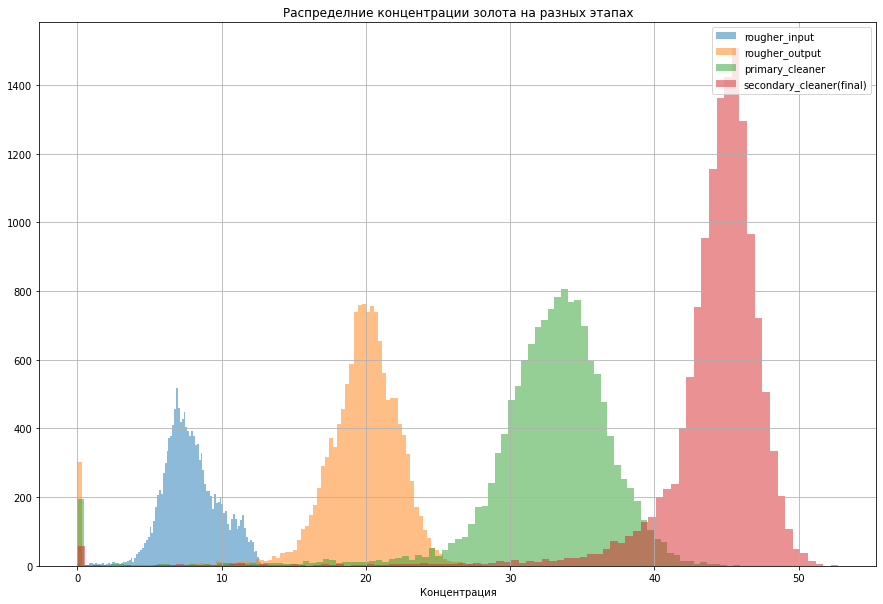

In [15]:
fig = plt.figure(figsize=(15,10))
plt.hist(df_train['rougher.input.feed_au'], bins = 100, alpha=0.5, label='rougher_input')
plt.hist(df_train['rougher.output.concentrate_au'], bins = 100, alpha=0.5, label='rougher_output')
plt.hist(df_train['primary_cleaner.output.concentrate_au'], bins = 100, alpha=0.5, label='primary_cleaner')
plt.hist(df_train['final.output.concentrate_au'], bins = 100, alpha=0.5, label='secondary_cleaner(final)')
plt.grid()
plt.legend(loc='upper right')
plt.xlabel('Концентрация')
plt.title('Распределние концентрации золота на разных этапах');

Распределение концентрации неуклонно растет на каждом этапе очистки. Посмотрим что происходит с другими металлами и сравним результаты.

In [16]:
x = ['rougher.input', 'rougher.ouput', 'primary_cleaner','final']
y_au = [df_train['rougher.input.feed_au'].median(),
    df_train['rougher.output.concentrate_au'].median(),
    df_train['primary_cleaner.output.concentrate_au'].median(),
    df_train['final.output.concentrate_au'].median()]

In [17]:
y_ag = [df_train['rougher.input.feed_ag'].median(),
    df_train['rougher.output.concentrate_ag'].median(),
    df_train['primary_cleaner.output.concentrate_ag'].median(),
    df_train['final.output.concentrate_ag'].median()]

In [18]:
y_pb = [df_train['rougher.input.feed_pb'].median(),
    df_train['rougher.output.concentrate_pb'].median(),
    df_train['primary_cleaner.output.concentrate_pb'].median(),
    df_train['final.output.concentrate_pb'].median()]

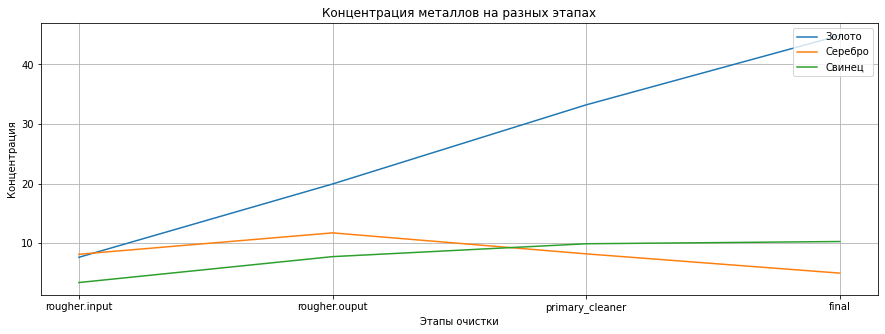

In [19]:
fig = plt.figure(figsize=(15,5))
plt.plot(x, y_au, label='Золото')
plt.plot(x, y_ag, label='Серебро')
plt.plot(x, y_pb, label='Свинец')
plt.grid()
plt.legend(loc='upper right')
plt.xlabel('Этапы очистки')
plt.ylabel('Концентрация')
plt.title('Концентрация металлов на разных этапах');

Видно, что концентрация других металлов либо меняет не сильно, как у свинца, либо падает, как у серебра.

### Сравнение распределения гранул сырья в тренировочной и тестовой выборке

In [20]:
train = df_train['rougher.input.feed_size']

In [21]:
test = df_test['rougher.input.feed_size']

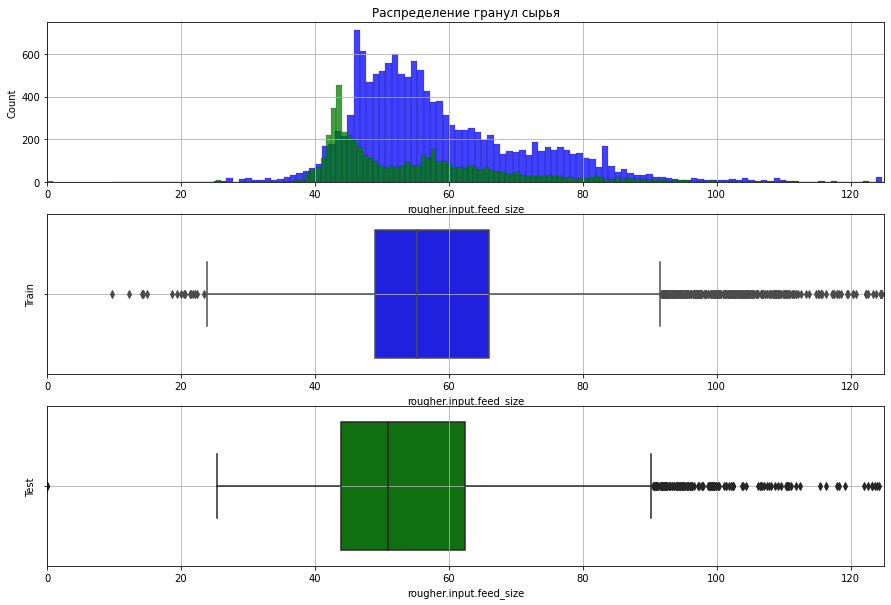

In [22]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(15,10))

sns.histplot(data=df_train, x="rougher.input.feed_size", color ='blue', label='train', bins=500, ax=ax1)
sns.histplot(data=df_test, x="rougher.input.feed_size", color='green', label='test', bins=500, ax=ax1)
sns.boxplot(data=train, x=train, ax=ax2, color ='blue')
sns.boxplot(data=test, x=test, ax=ax3, color ='green')
ax1.set_xlim(0, 125)
ax2.set_xlim(0, 125)
ax3.set_xlim(0, 125)
ax1.grid()
ax2.grid()
ax3.grid()
ax3.set_ylabel('Test')
ax2.set_ylabel('Train')
ax1.set_title('Распределение гранул сырья');

Распределение гранул сырья в тренировочной и тестовой выборке не сильно отличаются друг от друга. Проверим суммарную концентрацию всех веществ на разных стадиях

### Исследование суммарной концентрации всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

In [23]:
rougher_input = df_train['rougher.input.feed_au'] + df_train['rougher.input.feed_ag']\
    + df_train['rougher.output.concentrate_pb']
rougher_output = df_train['rougher.output.concentrate_ag'] + df_train['rougher.output.concentrate_pb']\
         + df_train['rougher.output.concentrate_au']
final_output = df_train['final.output.concentrate_ag'] + df_train['final.output.concentrate_pb']\
         + df_train['final.output.concentrate_au']

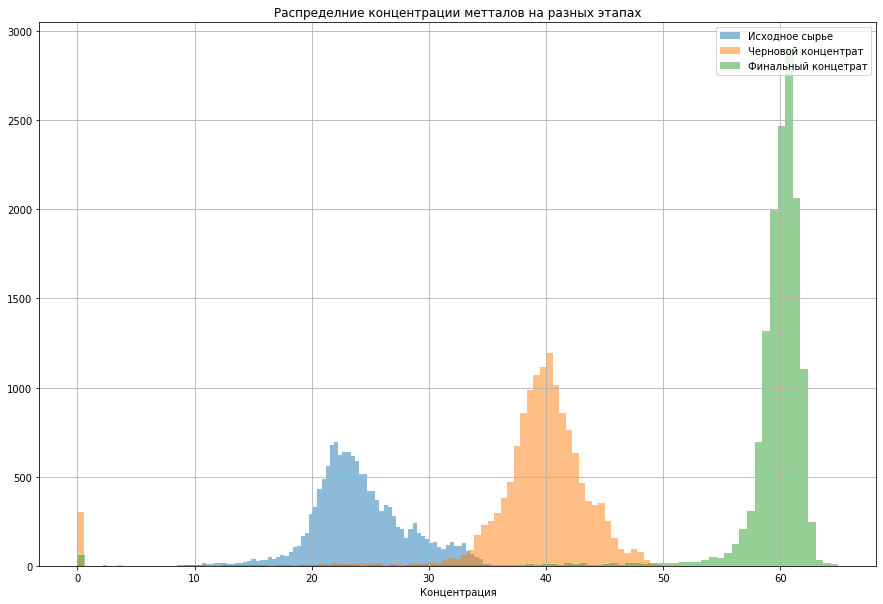

In [24]:
fig = plt.figure(figsize=(15,10))
plt.hist(rougher_input, bins = 100, alpha=0.5, label='Исходное сырье')
plt.hist(rougher_output, bins = 100, alpha=0.5, label='Черновой концентрат')
plt.hist(final_output, bins = 100, alpha=0.5, label='Финальный концетрат')
plt.grid()
plt.legend(loc='upper right')
plt.xlabel('Концентрация')
plt.title('Распределние концентрации метталов на разных этапах');

В данных присутствуют аномалии, когда на этапе чернового и финального концентратов концентрация металлов равна нулю.

In [26]:
df_train.loc[(rougher_output == 0) | (final_output == 0), ['rougher.input.feed_au', 'rougher.input.feed_ag',
                                                        'rougher.input.feed_pb', 'rougher.output.concentrate_ag',
                                                        'rougher.output.concentrate_pb', 'rougher.output.concentrate_au',
                                                        'final.output.concentrate_ag', 'final.output.concentrate_pb',
                                                        'final.output.concentrate_au']]

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_au
45,7.114065,7.521974,2.811569,0.0,0.0,0.0,4.566664,10.406178,46.614456
46,7.651522,7.313187,2.973841,0.0,0.0,0.0,4.577832,10.691605,46.250638
47,5.587750,7.934791,1.763437,0.0,0.0,0.0,4.591462,10.628846,46.663335
48,4.752992,7.756881,1.025762,0.0,0.0,0.0,5.296830,10.597469,44.015642
49,5.122801,5.393466,1.824835,0.0,0.0,0.0,8.162896,8.877528,40.715973
...,...,...,...,...,...,...,...,...,...
10330,7.951063,8.576019,2.607144,0.0,0.0,0.0,4.909904,9.941006,47.660737
10331,8.715784,8.640039,2.905023,0.0,0.0,0.0,4.797572,9.889303,47.801056
10332,9.026122,8.769059,3.020251,0.0,0.0,0.0,4.329492,9.413122,49.412576
10333,8.752430,8.705607,2.881386,0.0,0.0,0.0,4.317169,9.642271,48.839994


Избавимся от аномалий.

In [27]:
df_train = df_train[(rougher_output != 0) & (final_output != 0)]

In [28]:
df_train.shape

(13795, 87)

In [29]:
rougher_input = df_train['rougher.input.feed_au'] + df_train['rougher.input.feed_ag']\
    + df_train['rougher.output.concentrate_pb']
rougher_output = df_train['rougher.output.concentrate_ag'] + df_train['rougher.output.concentrate_pb']\
         + df_train['rougher.output.concentrate_au']
final_output = df_train['final.output.concentrate_ag'] + df_train['final.output.concentrate_pb']\
         + df_train['final.output.concentrate_au']

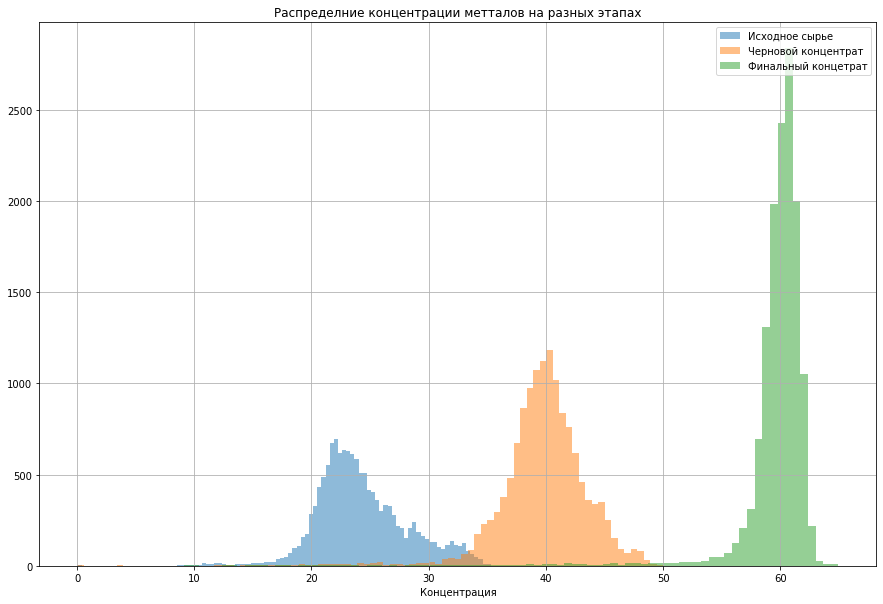

In [30]:
fig = plt.figure(figsize=(15,10))
plt.hist(rougher_input, bins = 100, alpha=0.5, label='Исходное сырье')
plt.hist(rougher_output, bins = 100, alpha=0.5, label='Черновой концентрат')
plt.hist(final_output, bins = 100, alpha=0.5, label='Финальный концетрат')
plt.grid()
plt.legend(loc='upper right')
plt.xlabel('Концентрация')
plt.title('Распределние концентрации метталов на разных этапах');

От аномалий избавились, переходим к построению модели.

## Модель

### Функция для вычисления итоговой sMAPE

In [32]:
def smape(y_true, y_pred):
    error = np.abs(y_true - y_pred)
    scale = (np.abs(y_true) + np.abs(y_pred)) / 2

    return np.mean(error / scale) * 100

In [33]:
def final_smape(smape_rougher, smape_final):
    return 0.25 * (smape_rougher * -1).mean() + 0.75 *(smape_final * -1).mean()

### Выбор лучшей модели

In [34]:
X_test = df_test.drop('date', axis=1)

In [35]:
X_train = df_train[df_test.drop('date', axis=1).columns]

In [36]:
y_train_final = df_train['final.output.recovery']

In [37]:
y_train_rougher = df_train['rougher.output.recovery']

In [38]:
scorer = make_scorer(smape, greater_is_better = False)

In [39]:
lr = LinearRegression()

In [40]:
smape_rougher = cross_val_score(lr, X_train, y_train_rougher, cv=5, scoring=scorer)

In [41]:
smape_final = cross_val_score(lr, X_train, y_train_final, cv=5, scoring=scorer)

In [42]:
final_smape(smape_rougher, smape_final)

10.059602069093534

In [43]:
rfr = RandomForestRegressor()

In [44]:
param_grid = {"max_depth": range(1, 10)}

In [45]:
grid1 = GridSearchCV(rfr, param_grid, scoring=scorer, cv=5, n_jobs=-1)

In [ ]:
grid1.fit(X_train, y_train_rougher)

In [ ]:
smape_rougher_rfr = grid1.best_score_

In [ ]:
grid2 = GridSearchCV(rfr, param_grid, scoring=scorer, cv=5, n_jobs=-1)

In [49]:
grid2.fit(X_train, y_train_final)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': range(1, 10)},
             scoring=make_scorer(smape, greater_is_better=False))

In [50]:
smape_final_rfr = grid2.best_score_

In [51]:
final_smape(smape_rougher_rfr, smape_final_rfr)

8.455440301701051

In [52]:
grid2.best_estimator_

RandomForestRegressor(max_depth=4)

Лучшая модель RandomForestRegressor(max_depth=5). Проверим работоспособность на тестовой выборке.

### Проверка на тестовой выборке

In [53]:
y_test_rougher = grid1.predict(X_test)

In [54]:
y_test_final = grid2.predict(X_test)

In [55]:
df_test['y_test_rougher.output.recovery'] = y_test_rougher

In [56]:
df_test['y_test_final.output.recovery'] = y_test_final

In [57]:
df_full['date'].nunique()

19439

In [58]:
len(df_full)

19439

Т.к. в столбце date все значения уникальные, соединим тестовую выборку с предсказанными значениями с истинными значениями recovery и посчитаем итоговый smape.

In [59]:
df_test = df_test.merge(df_full[['date', 'rougher.output.recovery', 'final.output.recovery']], how='left', on='date')

In [60]:
smape_rougher_test = 0.25 * smape(df_test['rougher.output.recovery'], df_test['y_test_rougher.output.recovery'])\
    + 0.75 * smape(df_test['final.output.recovery'], df_test['y_test_final.output.recovery'])

In [61]:
smape_rougher_test

9.434746805332999

Выведем первые 5 образцов с лучшей финальной предсказанной эффективностью обогощения.

In [62]:
df_test.sort_values('y_test_final.output.recovery', ascending=False).head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,y_test_rougher.output.recovery,y_test_final.output.recovery,rougher.output.recovery,final.output.recovery
3733,2017-10-24 09:59:59,221.870504,11.991570,6.990000,2.601881,1700.187070,-499.843179,1703.284098,-501.876429,1599.684732,...,14.966648,-498.827433,10.982086,-500.105456,16.000050,-499.527926,91.388424,74.331550,89.886629,76.952216
3732,2017-10-24 08:59:59,190.615369,11.834078,6.990000,2.587650,1699.806412,-487.858371,1696.865986,-538.891378,1629.524918,...,14.930861,-500.233342,11.026507,-500.018066,15.991582,-500.624325,91.388424,73.536627,92.144829,80.429396
4464,2017-11-24 18:59:59,213.484960,9.997532,7.840000,2.399836,1601.127603,-499.916009,1597.895025,-500.464976,1599.754711,...,11.031814,-501.233784,9.047385,-500.855253,16.001351,-500.518572,91.285286,73.300850,92.268505,69.582670
4426,2017-11-23 04:59:59,229.982662,11.964658,7.333334,2.531648,1650.972287,-500.259318,1647.570013,-504.776151,1649.665658,...,10.988459,-498.370415,9.007680,-500.133861,15.979783,-498.920806,91.364807,73.300850,91.643711,70.436881
4425,2017-11-23 03:59:59,243.196713,12.024461,7.400000,2.392553,1651.643771,-499.549880,1648.053407,-492.306052,1650.241039,...,10.957999,-500.915120,9.061315,-500.016264,15.990467,-501.875714,91.364807,73.300850,91.159447,71.700411


**Общий вывод:** Был исследован тренировочный датасет с параметрами добычи и очистки. Проверили концентрацию металлов на каждом этапе очистки, аномалий выявлено не было. Распределение гранул сырья в тренировочной и тестовой выборке имеют не значительные расхождения, что не должно влиять на качество модели. По итогам обучения на тренировочном датасете с помощью кросс валидации определили лучшую модель RandomForestRegressor(max_depth=5). Проверили модель на тестовом датасете и сравнили с истнинными значениями rougher.output.recovery и final.output.recovery. Итоговая метрика sMAPE получилось выше, чем на тренировочной выборке.